In [ ]:
#Reference: SimpleITK documentation: https://simpleitk.readthedocs.io/en/master/

In [10]:
import SimpleITK as sitk
from downloaddata import fetch_data as fdata
%matplotlib notebook
import gui
import registration_gui as rgui

import numpy as np
import os
OUTPUT_DIR = 'output'

<IPython.core.display.Javascript object>


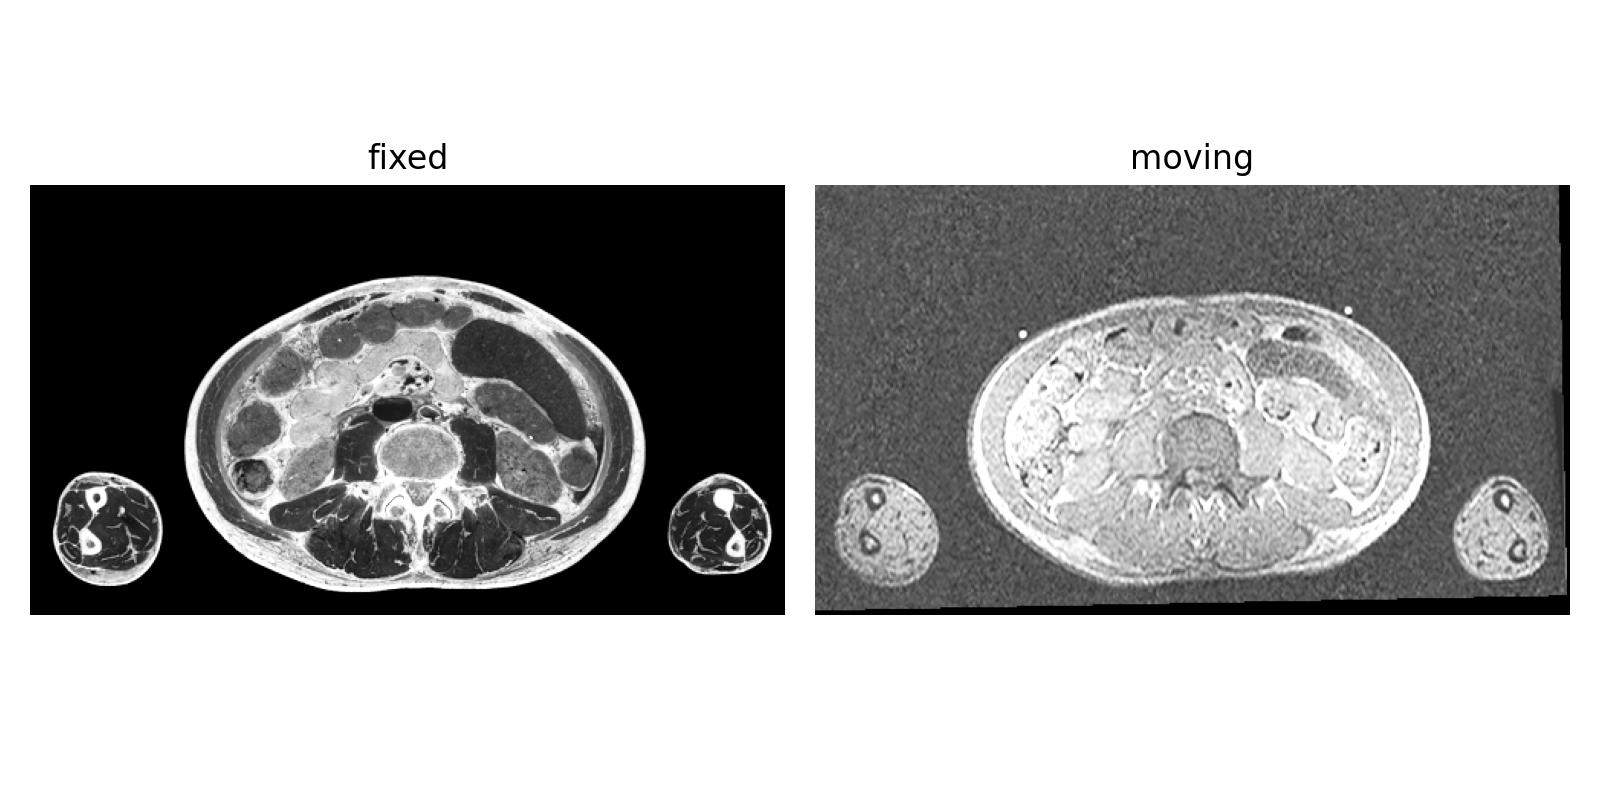

In [11]:
fixed_image =  sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/cryocleaned_abdomen_padded.mhd", sitk.sitkFloat32)
#moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/CT_abdomen.mhd", sitk.sitkFloat32)
moving_image = sitk.ReadImage("/Users/pronomabanerjee/Desktop/subvolumes_abdomen/TUTORIAL/output/MRI_transformed_SITK1.mhd", sitk.sitkFloat32)

ct_window_level = [835,162]
mr_window_level = [1036,520]

gui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   
                      title_list = ['fixed', 'moving'], figure_size=(8,4), window_level_list=[ct_window_level, mr_window_level]);

In [15]:
def command_iteration(filter):
    print(f"{filter.GetElapsedIterations():3} = {filter.GetMetric():10.5f}")


'''if len(sys.argv) < 4:
    print(
        f"Usage: {sys.argv[0]} <fixedImageFilter> <movingImageFile> <outputTransformFile>")
    sys.exit(1)'''

fixed = fixed_image

moving = moving_image

matcher = sitk.HistogramMatchingImageFilter()
matcher.SetNumberOfHistogramLevels(1024)
matcher.SetNumberOfMatchPoints(7)
matcher.ThresholdAtMeanIntensityOn()
moving = matcher.Execute(moving, fixed)

# The basic Demons Registration Filter
# Note there is a whole family of Demons Registration algorithms included in
# SimpleITK
#demons = sitk.DemonsRegistrationFilter()
#demons = sitk.DiffeomorphicDemonsRegistrationFilter()
demons = sitk.FastSymmetricForcesDemonsRegistrationFilter()
demons.SetNumberOfIterations(50)
# Standard deviation for Gaussian smoothing of displacement field
demons.SetStandardDeviations(1.0)

demons.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(demons))

displacementField = demons.Execute(fixed, moving)

print("-------")
print(f"Number Of Iterations: {demons.GetElapsedIterations()}")
print(f" RMS: {demons.GetRMSChange()}")

outTx = sitk.DisplacementFieldTransform(displacementField)

sitk.WriteTransform(outTx, os.path.join(OUTPUT_DIR, "detailsdeform2mri.tfm"))

  1 = 1955.17121
  2 = 1843.64480
  3 = 1779.87619
  4 = 1735.91061
  5 = 1702.90449
  6 = 1676.93748
  7 = 1655.80136
  8 = 1638.17987
  9 = 1623.14500
 10 = 1610.15396
 11 = 1598.65840
 12 = 1588.23788
 13 = 1578.68833
 14 = 1569.94044
 15 = 1561.84518
 16 = 1554.56053
 17 = 1547.45988
 18 = 1540.75379
 19 = 1534.40538
 20 = 1528.38019
 21 = 1522.63429
 22 = 1517.21960
 23 = 1512.42190
 24 = 1507.56542
 25 = 1502.85886
 26 = 1498.34991
 27 = 1494.01577
 28 = 1489.86435
 29 = 1485.89907
 30 = 1482.11970
 31 = 1478.76019
 32 = 1475.48216
 33 = 1472.20661
 34 = 1469.01401
 35 = 1465.91972
 36 = 1462.92686
 37 = 1460.05033
 38 = 1457.30616
 39 = 1454.72876
 40 = 1452.35741
 41 = 1449.88502
 42 = 1447.44445
 43 = 1445.19432
 44 = 1443.12956
 45 = 1441.29665
 46 = 1439.34017
 47 = 1437.40837
 48 = 1435.43981
 49 = 1433.42628
 50 = 1431.41612
-------
Number Of Iterations: 50
 RMS: 0.21884685178865218


In [16]:
if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(100)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)
    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    #simg1 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    # Use the // floor division operator so that the pixel type is
    # the same for all three images which is the expectation for
    # the compose filter.
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)

<IPython.core.display.Javascript object>


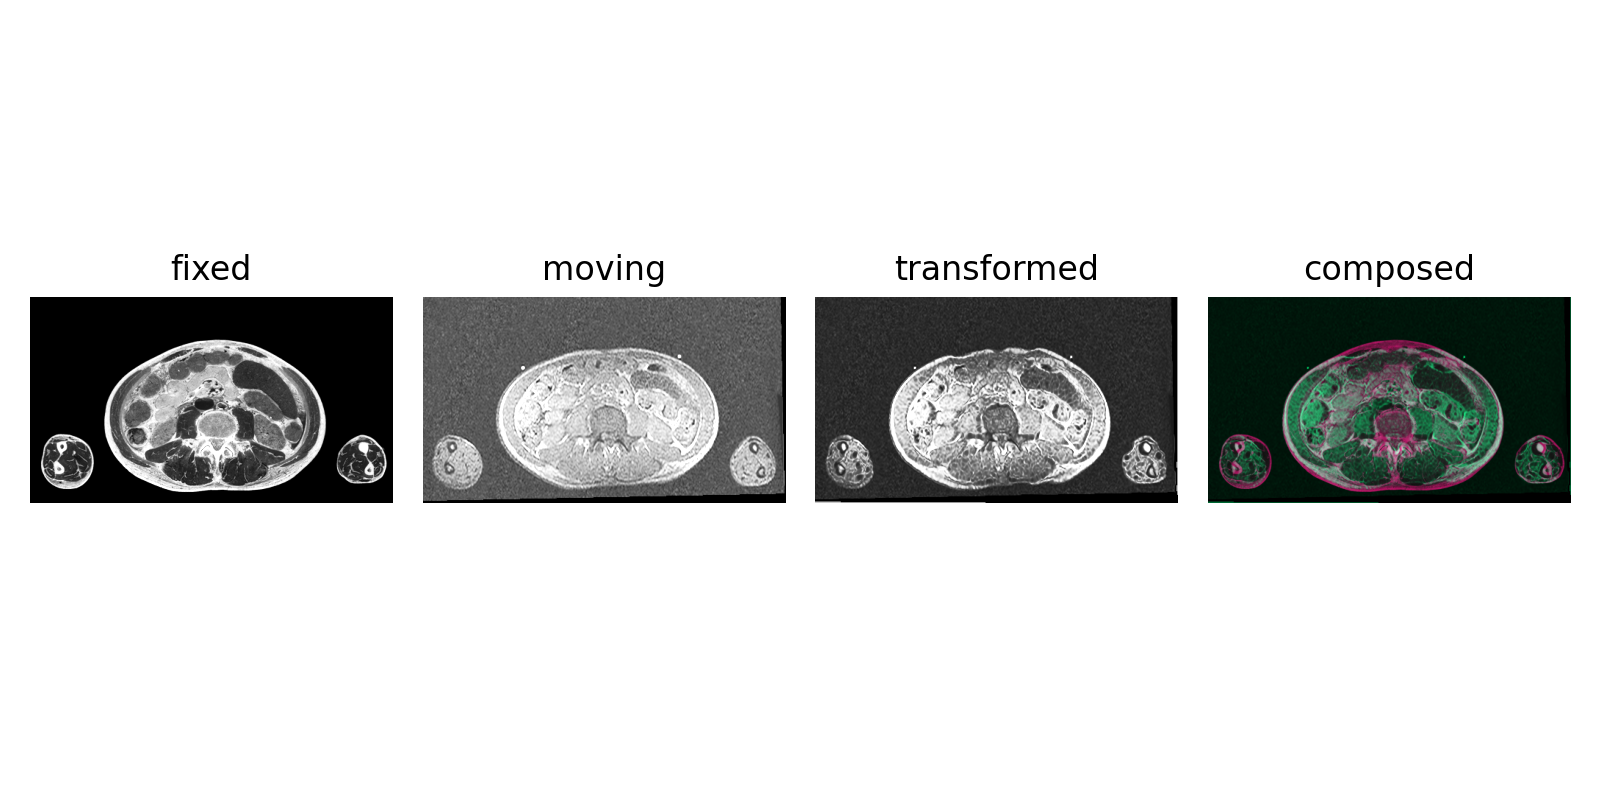

<IPython.core.display.Javascript object>


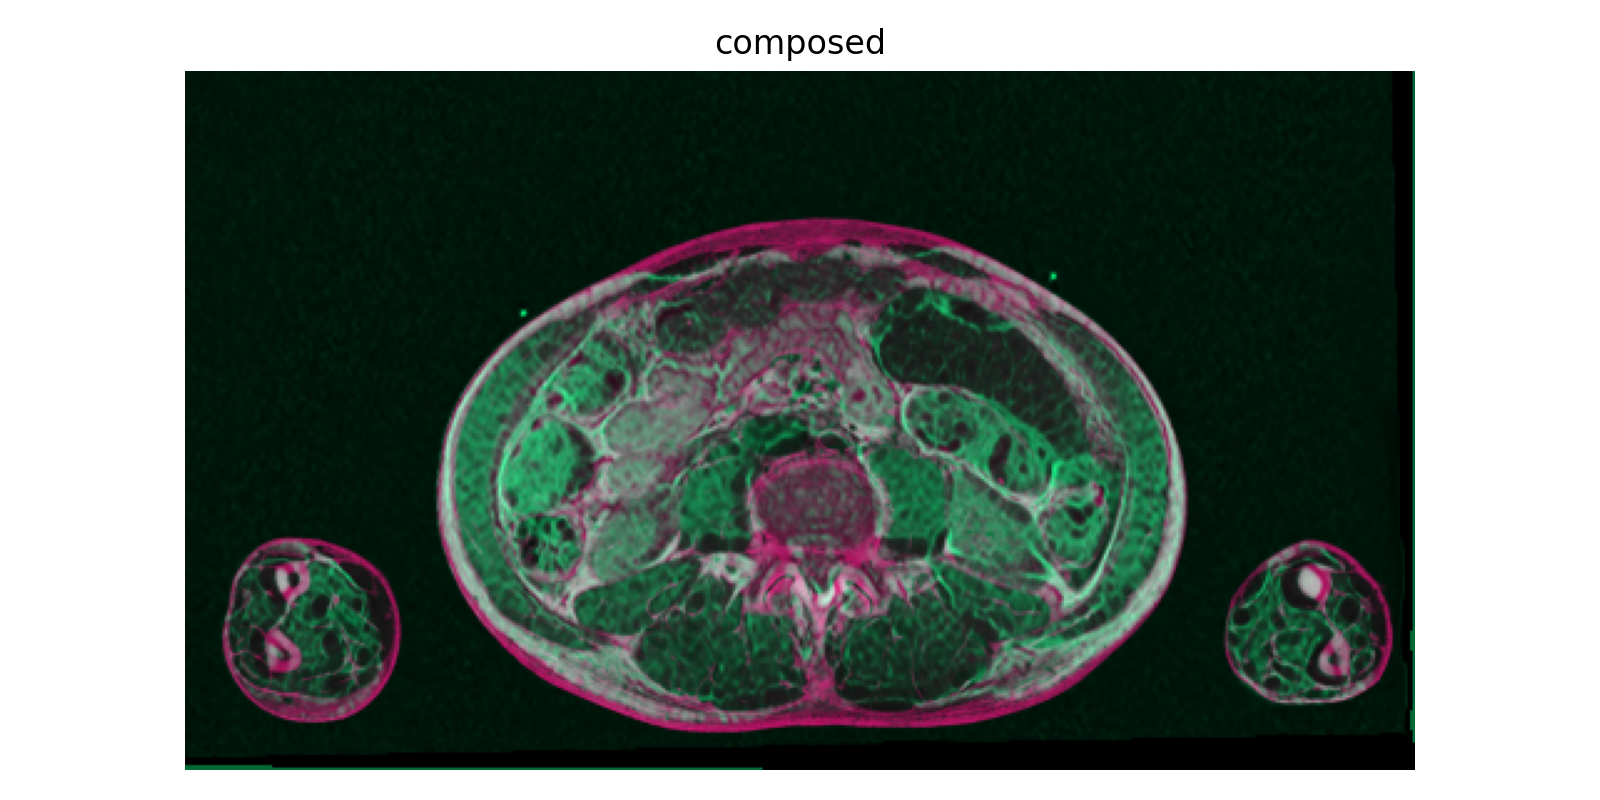

In [20]:
gui.MultiImageDisplay(image_list = [fixed_image, moving_image, out, cimg],                   
                      title_list = ['fixed', 'moving', 'transformed', 'composed'], figure_size=(8,4));


gui.MultiImageDisplay(image_list = [cimg],                   
                      title_list = ['composed'], figure_size=(8,4));

gui.MultiImageDisplay(image_list = [],                   
                      title_list = ['composed'], figure_size=(8,4));



In [26]:
#demons second round 

def command_iteration(filter):
    print(f"{filter.GetElapsedIterations():3} = {filter.GetMetric():10.5f}")


'''if len(sys.argv) < 4:
    print(
        f"Usage: {sys.argv[0]} <fixedImageFilter> <movingImageFile> <outputTransformFile>")
    sys.exit(1)'''

fixed = fixed_image

moving = out

matcher = sitk.HistogramMatchingImageFilter()
matcher.SetNumberOfHistogramLevels(1024)
matcher.SetNumberOfMatchPoints(17)
matcher.ThresholdAtMeanIntensityOn()
moving = matcher.Execute(moving, fixed)

# The basic Demons Registration Filter
# Note there is a whole family of Demons Registration algorithms included in
# SimpleITK
#demons = sitk.DemonsRegistrationFilter()
#demons = sitk.DiffeomorphicDemonsRegistrationFilter()
demons = sitk.FastSymmetricForcesDemonsRegistrationFilter()
demons.SetNumberOfIterations(50)
# Standard deviation for Gaussian smoothing of displacement field
demons.SetStandardDeviations(1.0)

demons.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(demons))

displacementField = demons.Execute(fixed, moving)

print("-------")
print(f"Number Of Iterations: {demons.GetElapsedIterations()}")
print(f" RMS: {demons.GetRMSChange()}")

outTx = sitk.DisplacementFieldTransform(displacementField)

sitk.WriteTransform(outTx, os.path.join(OUTPUT_DIR, "detailsdeform2mrisecondround.tfm"))

  1 = 1466.11296
  2 = 1363.93288
  3 = 1308.01499
  4 = 1271.72870
  5 = 1246.38113
  6 = 1227.97730
  7 = 1213.50601
  8 = 1199.59898
  9 = 1188.82137
 10 = 1180.10323
 11 = 1172.53002
 12 = 1165.95673
 13 = 1160.11580
 14 = 1154.73897
 15 = 1149.83134
 16 = 1145.25224
 17 = 1140.94363
 18 = 1136.96226
 19 = 1133.15514
 20 = 1129.66803
 21 = 1126.28665
 22 = 1123.15155
 23 = 1120.16332
 24 = 1117.35389
 25 = 1114.68234
 26 = 1112.11353
 27 = 1109.67001
 28 = 1107.35014
 29 = 1105.03297
 30 = 1102.95320
 31 = 1100.79710
 32 = 1098.80155
 33 = 1096.83648
 34 = 1094.97534
 35 = 1093.10331
 36 = 1091.35581
 37 = 1089.61019
 38 = 1087.95839
 39 = 1086.30125
 40 = 1084.75457
 41 = 1083.14349
 42 = 1081.68772
 43 = 1080.17398
 44 = 1078.76420
 45 = 1077.35300
 46 = 1076.00620
 47 = 1074.63127
 48 = 1073.37468
 49 = 1072.04651
 50 = 1070.82878
-------
Number Of Iterations: 50
 RMS: 0.22759086897803293


In [27]:
if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(100)
    resampler.SetTransform(outTx)

    out_two = resampler.Execute(moving)
    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    #simg1 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out_two), sitk.sitkUInt8)
    # Use the // floor division operator so that the pixel type is
    # the same for all three images which is the expectation for
    # the compose filter.
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)

<IPython.core.display.Javascript object>


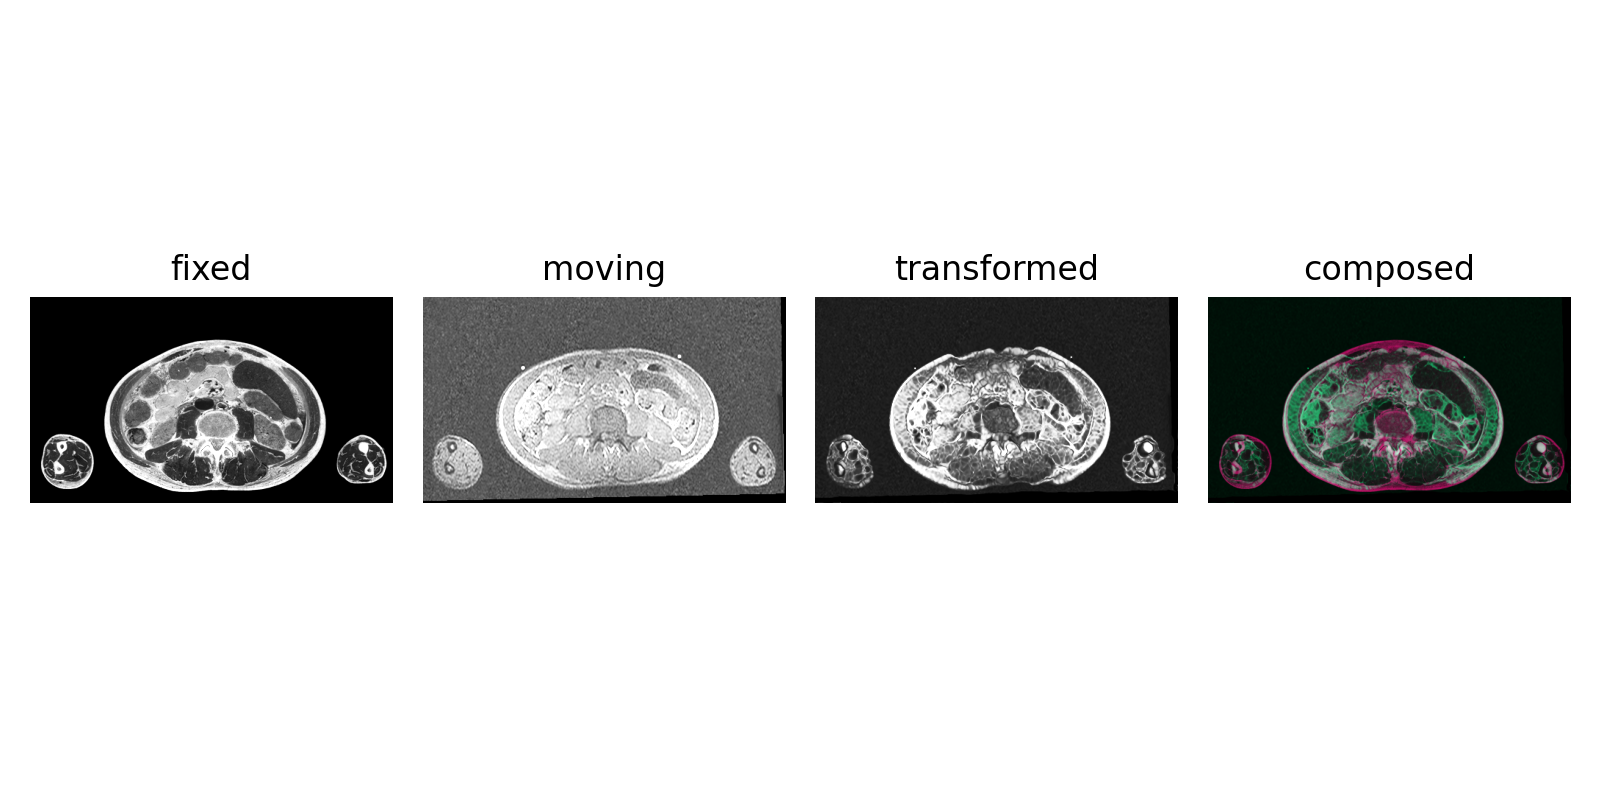

<IPython.core.display.Javascript object>


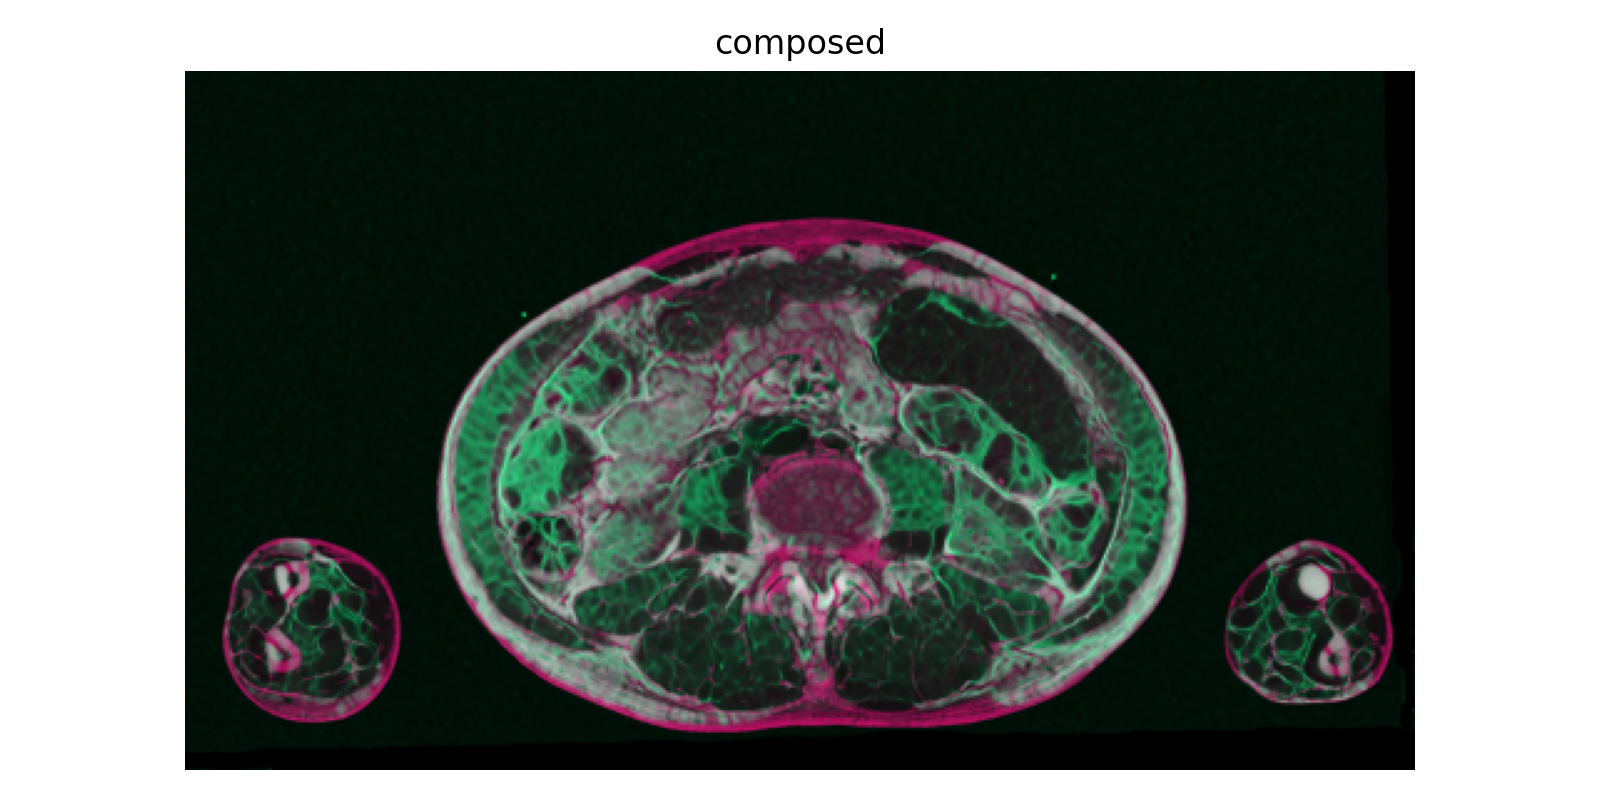

In [29]:
gui.MultiImageDisplay(image_list = [fixed_image, moving_image, out_two, cimg],                   
                      title_list = ['fixed', 'moving', 'transformed', 'composed'], figure_size=(8,4));


gui.MultiImageDisplay(image_list = [cimg],                   
                      title_list = ['composed'], figure_size=(8,4));


In [19]:
sitk.WriteImage(out, os.path.join(OUTPUT_DIR, "MRI_fsfdemonsafterrigid.mhd"))